## Estimador de Kaplan-Meier con grupos

Hasta ahora, vimos cómo podíamos encontrar la probabilidad de supervivencia y la probabilidad de peligro para todas nuestras observaciones. Ahora es el momento de realizar un análisis de nuestros datos para determinar si existe alguna diferencia en la probabilidad de supervivencia si dividimos nuestros datos en grupos en función de características específicas. Dividamos nuestros datos en dos grupos según el sexo: masculino y femenino. Nuestro objetivo aquí es comprobar si existe alguna diferencia significativa en la tasa de supervivencia si dividimos nuestro conjunto de datos en función del sexo. Más adelante en este tutorial, veremos sobre qué base dividimos los datos en grupos.

##### 1) Importe las bibliotecas necesarias

In [1]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#Read the dataset:

data = pd.read_csv("lung.csv")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [2]:
#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


##### Cree dos objetos de Kaplan-Meier-Fitter ():

In [3]:
#Create two objects for groups:

#kmf_m for male data:
#kmf_f for female data:

kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

##### Dividir los datos en dos grupos

In [4]:
#Dividing data into groups:

Male = data.query("sex == 1")
Female = data.query("sex == 2")

#View data of Male group:

Male.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [5]:
#View data of Female group:

Female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0
11,16.0,654,2,68,2,2.0,70.0,70.0,NaN,23.0,1.0
12,11.0,728,2,68,2,1.0,90.0,90.0,NaN,5.0,1.0
18,1.0,61,2,56,2,2.0,60.0,60.0,238.0,10.0,1.0


#####  Encajar datos en nuestros objetos

In [6]:
#Fit data into objects:

kmf_m.fit(durations =  Male["time"],event_observed = Male["dead"] ,label="Male")
kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"], label="Female")

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

##### Mesa de eventos para el grupo masculino:

In [7]:
#Event table for male group:

kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [8]:
#Event table for female group:

kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


##### Predecir probabilidades de supervivencia:

Ahora podemos predecir la probabilidad de supervivencia de ambos grupos.

In [9]:
kmf_m.predict(11)

0.9782608695652172

In [10]:
kmf_f.predict(11)

0.9888888888888887

##### Obtenga la lista completa de probabilidades de supervivencia:

##### a) Probabilidad de supervivencia para un grupo de hombres:

In [11]:
kmf_m.survival_function_

,Male
timeline,
0.0,1.000000
11.0,0.978261
12.0,0.971014
13.0,0.956522
15.0,0.949275
...,...
814.0,0.053571
840.0,0.053571
883.0,0.035714


##### Probabilidad de supervivencia para el grupo de mujeres:

In [12]:
kmf_f.survival_function_

,Female
timeline,
0.0,1.000000
5.0,0.988889
60.0,0.977778
61.0,0.966667
62.0,0.955556
...,...
735.0,0.124822
740.0,0.124822
765.0,0.083214


##### Trace la gráfica de probabilidades de supervivencia:

Text(0.5, 1.0, 'KMF')

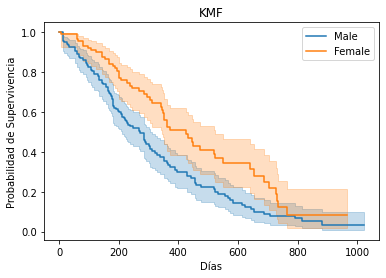

In [15]:
#Plot the survival_function data:

kmf_m.plot()
kmf_f.plot()

plt.xlabel("Días")
plt.ylabel("Probabilidad de Supervivencia")
plt.title("KMF")

Aquí podemos notar que la probabilidad de que las mujeres sobrevivan al cáncer de pulmón es mayor que la de los hombres. Por lo tanto, a partir de estos datos, podemos decir que los investigadores médicos deberían centrarse más en los factores que conducen a las bajas tasas de supervivencia de los pacientes masculinos.

##### Obtenga la densidad acumulativa:

a) Para el grupo masculino:

In [16]:
kmf_m.cumulative_density_

,Male
timeline,
0.0,0.000000
11.0,0.021739
12.0,0.028986
13.0,0.043478
15.0,0.050725
...,...
814.0,0.946429
840.0,0.946429
883.0,0.964286


b) Para el grupo femenino:

In [17]:
kmf_f.cumulative_density_

,Female
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022222
61.0,0.033333
62.0,0.044444
...,...
735.0,0.875178
740.0,0.875178
765.0,0.916786


##### Trace el gráfico de densidad acumulada:

Text(0, 0.5, 'Probabilidad')

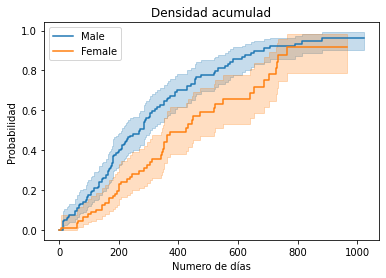

In [18]:
#PLot the graph for cumulative density for both groups:

kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()
plt.title("Densidad acumulad")
plt.xlabel("Numero de días")
plt.ylabel("Probabilidad")

##### Función de peligro

In [19]:
from lifelines import NelsonAalenFitter

Encaja los datos en nuestros objetos:

In [20]:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male["time"],event_observed = Male["dead"])
naf_f.fit(Female["time"],event_observed = Female["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 90 total observations, 37 right-censored observations>

##### Probabilidad de peligro acumulada para ambos grupos

In [21]:
naf_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
11.0,0.021899
12.0,0.029306
13.0,0.044287
15.0,0.051863
...,...
814.0,2.831337
840.0,2.831337
883.0,3.164670


In [22]:
naf_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022347
61.0,0.033711
62.0,0.045205
...,...
735.0,1.988977
740.0,1.988977
765.0,2.322310


##### Trace el gráfico para la probabilidad de peligro acumulada:

Text(0, 0.5, 'Cumulative Hazard')

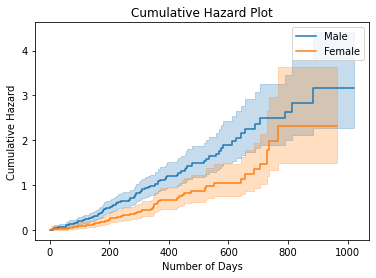

In [23]:
naf_m.plot_cumulative_hazard(label="Male")
naf_f.plot_cumulative_hazard(label="Female")
plt.title("Cumulative Hazard Plot")
plt.xlabel("Number of Days")
plt.ylabel("Cumulative Hazard")

##### El tiempo medio hasta el evento para ambos grupos

In [25]:
kmf_m.conditional_time_to_event_

,Male - Conditional median duration remaining to event
timeline,
0.0,270.0
11.0,272.0
12.0,271.0
13.0,271.0
15.0,270.0
...,...
814.0,inf
840.0,inf
883.0,inf


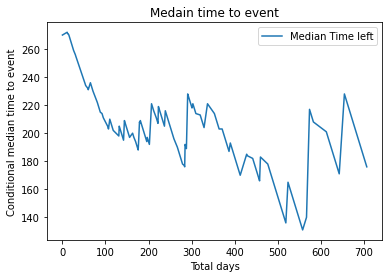

In [27]:
# El gráfico de tiempo medio hasta el evento para el grupo de hombres:
median_time_to_event = kmf_m.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [30]:
# El tiempo medio hasta el evento para el grupo femenino:
kmf_f.conditional_time_to_event_

,Female - Conditional median duration remaining to event
timeline,
0.0,426.0
5.0,421.0
60.0,373.0
61.0,372.0
62.0,371.0
...,...
735.0,inf
740.0,inf
765.0,inf


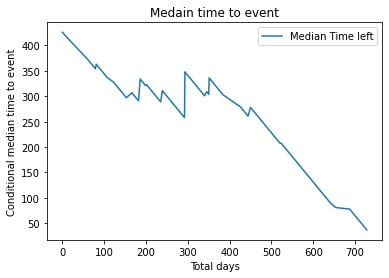

In [31]:
# El gráfico de tiempo medio hasta el evento para el grupo de mujeres:
median_time_to_event = kmf_f.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

##### Probabilidad de supervivencia con intervalo de confianza para ambos grupos

In [32]:
kmf_m.confidence_interval_survival_function_

,Male_lower_0.95,Male_upper_0.95
0.0,1.000000,1.000000
11.0,0.934122,0.992937
12.0,0.924619,0.989022
13.0,0.905787,0.980229
15.0,0.896549,0.975490
...,...,...
814.0,0.019335,0.114081
840.0,0.019335,0.114081
883.0,0.008603,0.096828
1010.0,0.008603,0.096828


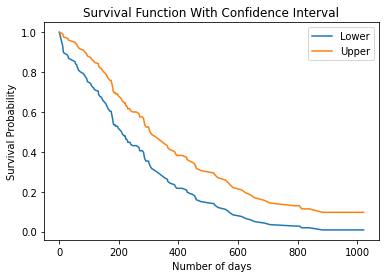

In [33]:
# Gráfico de probabilidad de supervivencia con intervalo de confianza para el grupo de hombres:
confidence_surv_func = kmf_m.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Male_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Male_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [34]:
# Probabilidad de supervivencia con intervalo de confianza para el grupo de mujeres:
kmf_f.confidence_interval_survival_function_

,Female_lower_0.95,Female_upper_0.95
0.0,1.000000,1.000000
5.0,0.923743,0.998427
60.0,0.914060,0.994396
61.0,0.900217,0.989126
62.0,0.885909,0.983083
...,...,...
735.0,0.042931,0.252736
740.0,0.042931,0.252736
765.0,0.018505,0.212364
821.0,0.018505,0.212364


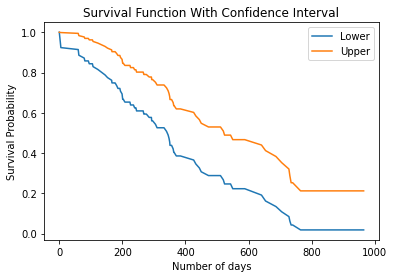

In [35]:
#Gráfico de probabilidad de supervivencia con intervalo de confianza para el grupo de mujeres:
confidence_surv_func = kmf_f.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Female_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Female_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

##### Comparación de densidad acumulada frente a peligro acumulativo:

Text(0.5, 0, 'Number of Days')

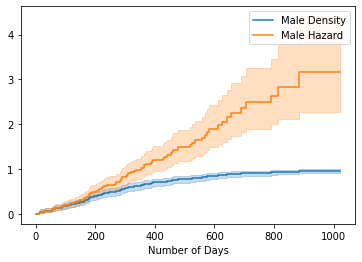

In [36]:
kmf_m.plot_cumulative_density(label="Male Density")
naf_m.plot_cumulative_hazard(label="Male Hazard")
plt.xlabel("Number of Days")

Text(0.5, 0, 'Number of Days')

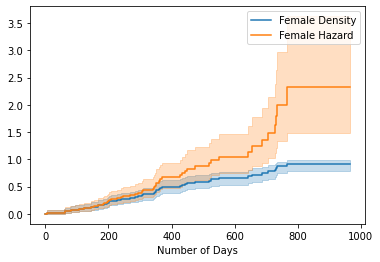

In [37]:
kmf_f.plot_cumulative_density(label="Female Density")
naf_f.plot_cumulative_hazard(label="Female Hazard")
plt.xlabel("Number of Days")

## Prueba de rango logarítmico:

La prueba de rango logarítmico es una prueba de hipótesis que se utiliza para comparar la distribución de supervivencia de dos muestras.

Objetivo: Nuestro objetivo es ver si existe alguna diferencia significativa entre los grupos que se comparan.

Hipótesis nula : La hipótesis nula establece que no hay diferencia significativa entre los grupos estudiados. Si hay una diferencia significativa entre esos grupos, entonces tenemos que rechazar nuestra hipótesis nula.

##### ¿Cómo decimos que hay una diferencia significativa?

Un valor de p entre 0 y 1 denota la significancia estadística. Cuanto menor sea el valor p, más significativa será la diferencia estadística entre los grupos estudiados. Tenga en cuenta que nuestro objetivo es averiguar si existe alguna diferencia entre los grupos que estamos comparando. En caso afirmativo, podemos investigar más sobre por qué hay menos posibilidades de supervivencia para un grupo en particular en función de información diversa como su dieta, estilo de vida y otros.

Menos de (5% = 0.05) valor de P significa que hay una diferencia significativa entre los grupos que comparamos. Podemos dividir nuestros grupos según su sexo, edad, raza, método de tratamiento y otros.

##### Es una prueba para averiguar el valor de P.

In [38]:
# Obtenga las variables para la prueba de rango logarítmico:
Time_A = Male['time']
Event_A = Male['dead']

Time_B = Female['time']
Event_B = Female['dead']

In [39]:
from lifelines.statistics import logrank_test

results = logrank_test(Time_A, Time_B, event_observed_A=Event_A, event_observed_B=Event_B)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [40]:
print("P-value :",results.p_value)

P-value : 0.0013111645203554782


Hemos comparado las distribuciones de supervivencia de dos grupos diferentes utilizando el famoso método estadístico, la prueba de rango logarítmico. Aquí podemos notar que el valor p es 0.00131 (<0.005) para nuestros grupos, lo que denota que tenemos que rechazar la hipótesis nula y admitir que la función de supervivencia para ambos grupos es significativamente diferente. Los valores p nos dan una fuerte evidencia de que el "sexo" se asoció con el número de días de supervivencia. En resumen, podemos decir que el "sexo" de una persona marca una diferencia significativa en la probabilidad de supervivencia.